# Problem Set #4

# Hyun Ki Kim

# 02/05/2018

In [2]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sk
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm

# 1. Multiple Linear Regression

# (a)

In [3]:
df = pd.read_csv("Auto.csv",na_values = "?")

# (b)

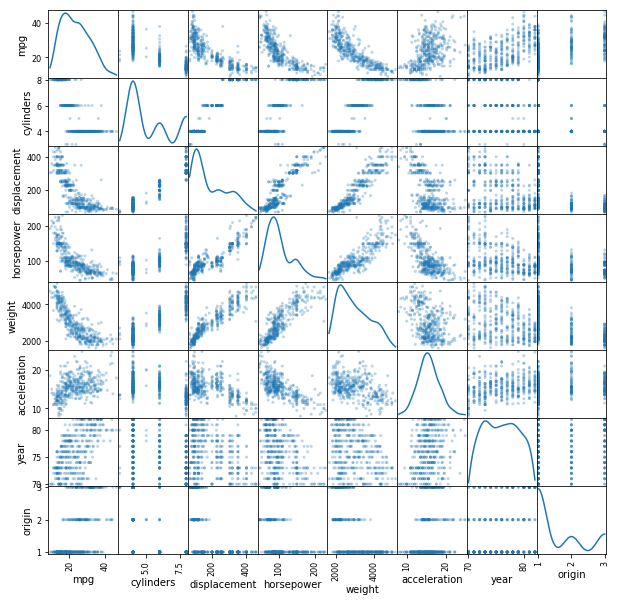

In [4]:
scatter_matrix(df, alpha=0.3, figsize=(10, 10),
               diagonal='kde')
print()

# (c)

In [5]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


# (d)

In [6]:
df["constant"] = 1
reg1 = sm.OLS(endog=df["mpg"], exog=df[["constant","cylinders","displacement","horsepower",
                                        "weight","acceleration","year","origin"]], missing='drop')
results1 = reg1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 05 Feb 2018   Prob (F-statistic):          2.04e-139
Time:                        06:58:39   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
constant       -17.2184      4.644     -3.707   

i. constant, displacement, weight, year, origin are statistically significant at 1% level in explaining mpg.

ii. cylinders, horsepower, acceleration are not statistically significant at 10% level in explaining mpg.

iii. one year increase in vehicle's year results in a predicted 0.75 increase in miles per gallon.

# (e)

displacement, horsepower, weight seems to have a nonlinear relationship with mpg.

In [7]:
df["displacement_sq"] = df["displacement"] ** 2
df["horsepower_sq"] = df["horsepower"] ** 2
df["weight_sq"] = df["weight"] ** 2
df["acceleration_sq"] = df["acceleration"] ** 2

reg2 = sm.OLS(endog=df["mpg"], exog=df[["constant","cylinders","displacement","horsepower",
                                        "weight","acceleration","year","origin","displacement_sq",
                                        "horsepower_sq", "weight_sq", "acceleration_sq"]], missing='drop')

results2 = reg2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Mon, 05 Feb 2018   Prob (F-statistic):          1.75e-160
Time:                        06:58:39   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
constant           20.1084      6.696     

ii. Adjusted R-squared increased from 0.818 to 0.866 by adding 4 squared terms.

iii. displacement and displacement_sq are not statistically significant at 10% level in explaining mpg. These two variables doesn't have much explaining power for mpg while holding all other variables constant.

iv. cylinders are still not statitstically significant at 10% level. However, the increased p-value might imply there are multicollinearity problem when adding 4 squared terms.

# (f)

In [8]:
prediction = results2.predict(exog=[1, 6, 200, 100, 3100, 15.1, 99, 1, 200**2, 100**2, 3100**2, 15.1**2])
print("Prediction: " + str(prediction[0]))

Prediction: 38.7321110967


# 2. Classification problem

In [9]:
table_dict = {"obs": [1, 2, 3, 4, 5, 6],
              "X1" : [0, 2, 0 , 0, -1, 1],
              "X2" : [3, 0, 1, 1, 0, 1], 
              "X3" : [0, 0, 3, 2, 1, 1], 
              "y" : ["Red", "Red", "Red", "Green", "Green", "Red"]}

# (a)

In [10]:
df = pd.DataFrame(data = table_dict).set_index("obs")
df["Euclidean_norm"] = np.sqrt(df["X1"]**2 + df["X2"]**2 + df["X3"]**2)
df

,X1,X2,X3,y,Euclidean_norm
obs,,,,,
1,0,3,0,Red,3.000000
2,2,0,0,Red,2.000000
3,0,1,3,Red,3.162278
4,0,1,2,Green,2.236068
5,-1,0,1,Green,1.414214
6,1,1,1,Red,1.732051


# (b)

In [11]:
y = df.y
X = np.column_stack((df["X1"], df["X2"], df["X3"]))
knn_1 = sk.neighbors.KNeighborsClassifier(n_neighbors=1)
results1 = knn_1.fit(X, y)
print(results1.predict([(0,0,0)]))

['Green']


Prediction for origin with K = 1 is Green, because the closest point is obs 5 (Green).

# (c)

In [12]:
knn_3 = sk.neighbors.KNeighborsClassifier(n_neighbors=3)
results3 = knn_3.fit(X, y)
print(results3.predict([(0,0,0)]))

['Red']


Prediction for orgin with K = 3 is Red, because 3 closest points are obs 2 (Red), 5 (Green), 6 (Red).

# (d)

If the Bayes decision boundary is highly non-linear, we can expect the best value for K to be small. Smaller K have more non-linear boundaries than larger K.

# (e)

In [13]:
knn_2 = sk.neighbors.KNeighborsClassifier(n_neighbors=2)
results2 = knn_2.fit(X, y)
print(results2.predict([(1,1,1)]))
neighbors = results2.kneighbors([(1,1,1)])
print(neighbors[1] + 1)

['Green']
[[6 4]]


Prediction for point (1,1,1) with K = 2 is Green, but 2 closeset points are obs 4 (Green), 6 (Red). KNN classifier doesn't work well with even number of K.

# 3. Multivariable logistic regression

In [14]:
df = pd.read_csv("Auto.csv",na_values = "?")
df["constant"] = 1
df["mpg_binary"] = (df["mpg"] >= df["mpg"].median()) * 1

# (a)

In [15]:
X = ["constant","cylinders", "displacement", "horsepower", "weight", "acceleration", "year", "origin"]
LogitModel = sm.Logit(endog = df["mpg_binary"], exog = df[X], missing = "drop")

In [16]:
result_logit = LogitModel.fit()
print(result_logit.summary())

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             mpg_binary   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Mon, 05 Feb 2018   Pseudo R-squ.:                  0.7101
Time:                        06:58:39   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
constant       -17.1549      5.764     -2.976      0.003     -28.452      -5.858
cylinders       -0.1626

constant, weight, year are statistically siginificant at 5% level for dividing mpg to high or low.

# (b)

In [17]:
df = df.dropna(axis = 0, how = 'any')
X = ["constant","cylinders", "displacement", "horsepower", "weight", "acceleration", "year", "origin"]
X_train, X_test, y_train, y_test = train_test_split(df[X], df['mpg_binary'], test_size = .5, random_state=10)

# (c)

In [18]:
LogReg = LogisticRegression()
results = LogReg.fit(X_train, y_train)

In [19]:
for i in range(len(results.coef_[0])):
    print("B" + str(i) + ": " + str(results.coef_[0][i]))

B0: -0.0690632228117
B1: -0.661819593909
B2: 0.0057144653605
B3: -0.0387443345208
B4: -0.0050015516312
B5: -0.14207780656
B6: 0.300083731924
B7: -0.150675889607


# (d)

In [20]:
y_pred = LogReg.predict(X_test)

In [21]:
result_matrix = confusion_matrix(y_test, y_pred)
result_matrix

array([[86, 13],
       [12, 85]])

In [22]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.87      0.87        99
          1       0.87      0.88      0.87        97

avg / total       0.87      0.87      0.87       196



This model predicts low mpg better than high mpg.